# Lab: Data gathering and cleaning
> Your name: Benjamin Fraeyman

> In data science, to get data to actually work with, an ETL (Extract, Transform and Load) procedure is used. 

> **Extraction** means that data is collected from somewhere

> **Transform** means that the data is converted into a useable format. In this step, the data is also cleaned. Data cleaning consists of several operations such as the removal of bad data, removal of duplicate data and the resolution of missing values.

> In the **Load** step, the data is stored for future usage (such as a database).

> In this practicum we will focus on the two first steps, extracting and transforming data. Furthermore, we also will do data exploration. Later in this course you will see how machine learning can be applied to make predictions using data. To be able to do this, the data has to be understood. Hence, data exploration is required.

![ETL](http://uploads.webflow.com/54e3cc87305a0f0a0665f71f/5537351f5f1065d401cde83c_etl-elt-architecture.jpg)

> Two new libraries will be used to do these steps: *matplotlib* a python visualization library and *pandas* a data manipulation library





### The use case:
> [EVA](http://www.evavzw.be/) is a website of a vegetarian organization. On their website they have a [list of restaurants](http://www.evavzw.be/resto) from all over Belgium. We want to have this data to get insights into these restaurants. However, EVA does not have a public web API which we can query to access this information. Hence, we will use the [selenium](https://selenium-python.readthedocs.io/) webscraper to scrape the information from their site. Subsequently, we will analyse the collected data.

![ETL](https://pbs.twimg.com/profile_images/378800000338402401/9c164104f9e1d9f5c2eea49368973ce4.png)

> Fill in this notebook, "**#+++ your code here +++**" gives an indication where code is expected

### Installation

> Anaconda will have installed pandas and matplotlib. However, selenium will not be installed. 

> To search for a selenium package open a shell/prompt:

>    * anaconda search -t conda selenium

> or go to https://anaconda.org/ and search for selenium

> Install as follows (example package, this can be different for you):

>    * conda install -c bokeh selenium

> Additionally, selenium requires a chromedriver: https://sites.google.com/a/chromium.org/chromedriver/downloads

> Put this driver in the same folders as this notebook

* * *

### Pandas

In [1]:
import pandas as pd
import numpy as np

> Pandas enables us to use DataFrames. A DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

In [2]:
#Generate a 2D array of random values. There are 10 rows and 4 columns
dummy_data = np.random.randint(0,100,size=(10, 4))

# The matching column headers for the 4 columns
matching_columns = ['A','B','C','D']

# Create a pandas DataFrame using the data and headers.
df = pd.DataFrame(dummy_data, columns=matching_columns)
df

,A,B,C,D
0,97,0,0,86
1,37,46,77,25
2,98,91,67,9
3,20,2,0,77
4,68,0,36,44
5,60,81,29,23
6,18,60,55,14
7,66,35,4,3
8,30,33,37,69
9,41,84,17,59


> We can select columns:

In [3]:
df.A

#alternative
df[['A']]

,A
0,97
1,37
2,98
3,20
4,68
5,60
6,18
7,66
8,30
9,41


> Or multiple columns

In [4]:
df[['A','B']]

,A,B
0,97,0
1,37,46
2,98,91
3,20,2
4,68,0
5,60,81
6,18,60
7,66,35
8,30,33
9,41,84


> A dataframe can be created from a numpy ndarray, a list of dictionaries, and many other options.
> Dataframes can be used to do many types of operations on them and also to plot the data in various ways.
> Throughout this lab you will get familier with pandas. The [pandas API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html) wil be your first source of information to check when you want to know more about pandas

Optional:
> If you want to get to know the basics of pandas feel free to do the [10 minutes of pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

* * *

### 1: Get data using the selenium web scraper and put it into a pandas DataFrame

In [5]:
import time
from selenium import webdriver
import pandas as pd
import requests
import matplotlib.pylab as plt
import numpy as np
from collections import Counter
%matplotlib inline

> Using selenium, we will first create a webdriver. A webdriver will allows us to programmatically access a website.

> If a Chrome window opens, do not close it.

In [6]:
url_eva = 'http://www.evavzw.be/resto'

#If you use a mac OSX or Ubuntu/Linux OS:
driver = webdriver.Chrome("./chromedriver")

#Windows:
#driver = webdriver.Chrome("./chromedriver.exe")

In [7]:
#driver.get method will navigate to a page given by the URL
driver.get(url_eva)

> On the EVA website there is a page called resto. On this page there is a matrix structure containing the details of the restaurants.  We want to get all the info from every restaurant and put it in a DataFrame. Each column will be a property such as name, street, zipcode,... and every row will be a restaurant.

In [8]:
restaurants = []
number_of_pages = 85

In [9]:
def check_existence(value,s):
    try:
        s.find_element_by_css_selector('.\\{} {}'.format(format(ord(value[0]), 'x'), value[1:]))
        return True
    except:
        return False

> We will loop over the pages to access all restaurants.
> In this loop we will loop over each restaurant div and extract all the information we need.
> The access the information we will use DOM elements and css class selectors.

> The available functions to scan the DOM can be found here: http://selenium-python.readthedocs.io/locating-elements.html

> In order to find these identifiers open the webpage in for example Chrome:
> * right mouse click + inspect will show you the source code (DOM)

In [10]:
# my comment: takes a little while

number_extracted_correctly = 0
number_bad_records = 0

#Loop over the different pages
for i in range(0, number_of_pages - 1):

    #In the DOM we look for the class "node-restaurant" which is associated to the restaurant divs
    selections = driver.find_elements_by_class_name('node-restaurant')

    #Loop over the divs
    for s in selections:
        
        #Try catch in python, to skip over the records that do not contain the info we need.
        try:
            
            # Dictionary called "o" wherein we will store the data:
            o = {} #+++ my code here +++
            
            # First we will extract the name and address of the restaurant
            # Extract the name of the restaurant
            o['name'] = s.find_element_by_tag_name("a").text #if you get an error you might have to add ".decode('utf-8')"
            o['street'] = s.find_element_by_class_name("street").text
            o['zipcode'] = s.find_element_by_class_name("postal").text
            o['city'] = s.find_element_by_class_name("city").text
            
            # Extract the tag information. If the tag is given to the restaurant, we will set the corresponding value
            # in the dictionary to True, else False using the check_existance function
            o['cateraar'] = check_existence("cateraar",s)
            o['snack'] = check_existence("snack",s)
            o['eethuis'] = check_existence("eethuis",s)
            o['veganvriendelijk'] = check_existence("veganvriendelijk",s)
            o['evavoordeel'] = check_existence("eva-voordeel",s)
            o['approvedbyeva'] = check_existence("approved-by-eva",s)
            o['vegan'] = check_existence("100-vegetarisch",s)
            o['plant'] = check_existence("100-plantaardig",s)
            o['gastronomisch'] = check_existence("gastronomisch",s)
            
            # Put the restaurant dictionary in the restaurants list
            restaurants.append(o) #+++ my code here +++
            
            number_extracted_correctly +=1
        except:
            number_bad_records +=1

    # Find the "volgende" button, to go to the next page
    selection = driver.find_element_by_class_name('pager-next')
    
    # Click on this a href
    selection.find_element_by_tag_name('a').click()
    
    # 1 second delay required, else the page will not be loaded when selecting elements
    time.sleep(1)

driver.close()

print "Number of correctly extracted restaurant records: %i" % number_extracted_correctly
print "Number of bad records that were ignored: %i" % number_bad_records

Number of correctly extracted restaurant records: 712
Number of bad records that were ignored: 44


In [11]:
# Using the created list of dictionaries, we create a Dataframe. 
# The column headers will be the dictionary keys.
df_resto = pd.DataFrame(restaurants)

### 2. Data exploration

In [12]:
# Printing the entire DataFrame would be too much. Therefore, we can use ".head(n)" to print the first n records
df_resto.head(5) #+++ my code here +++

,approvedbyeva,cateraar,city,eethuis,evavoordeel,gastronomisch,name,plant,snack,street,vegan,veganvriendelijk,zipcode
0,True,False,Neerijse,False,True,False,Biesbemd,False,False,Kamstraat 33,False,True,3040
1,True,False,Gent,True,False,False,Gu-í,True,True,Sint-Pietersnieuwstraat 97,False,True,9000
2,True,False,Deurle,True,False,False,Markies de Salade,True,False,Xavier de Cocklaan 69,True,True,9831
3,True,True,Antwerpen,False,True,False,OKOZ,False,False,Nationalestraat 92,False,True,2000
4,True,True,Ledeberg,False,True,False,Qourgette,False,False,Landjuweelstraat 23,True,True,9050


#### How many restaurants have the tag "eethuis"?
> HINT: select the matching column from the DataFrame and check the [value_counts](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) function

In [13]:
df_resto["eethuis"].value_counts() #+++ my code here +++

True     511
False    201
Name: eethuis, dtype: int64

#### Plot the results in a pie chart. 
>The pie chart should have two pieces. The first piece should be the number of restaurants that are "eethuis" and the other piece the number of restaurants to are not "eethuis"
> Add the percentages in the respective pieces.


>HINT: Check the pandas documentation on how to plot data

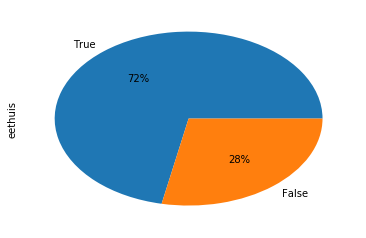

In [14]:
df_resto["eethuis"].value_counts().plot.pie(autopct='%1.0f%%') #+++ my code here +++

#### How many restaurants have the tag "snack"?

In [15]:
df_resto["snack"].value_counts() #+++ my code here +++

False    542
True     170
Name: snack, dtype: int64

#### Plot the matching pie chart as before (but for snack)

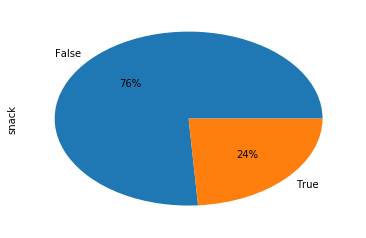

In [16]:
df_resto["snack"].value_counts().plot.pie(autopct='%1.0f%%') #+++ my code here +++

#### How many restaurant have the tag "cateraar"?

In [17]:
df_resto["cateraar"].value_counts() #+++ my code here +++

False    625
True      87
Name: cateraar, dtype: int64

#### Plot the matching pie chart as before

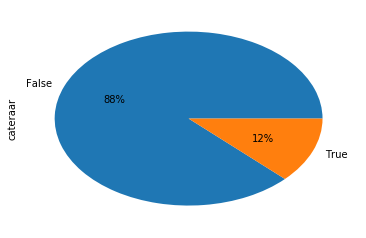

In [18]:
df_resto["cateraar"].value_counts().plot.pie(autopct='%1.0f%%') #+++ my code here +++

#### How many restaurants are both "eethuis" and "cateraar"?
> HINT: You can use boolean indexes similar to as in python. In pandas you can for example do this: df[df.A>3]

In [19]:
#+++ my code here +++
print df_resto[df_resto.cateraar == True][df_resto.eethuis == True].shape[0]
df_resto[df_resto.cateraar == True][df_resto.eethuis == True]

25


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,approvedbyeva,cateraar,city,eethuis,evavoordeel,gastronomisch,name,plant,snack,street,vegan,veganvriendelijk,zipcode
9,False,True,Sint - Pauwels,True,False,False,De Koerier,False,False,Kerkstraat 27,False,False,9170
142,False,True,Sint Denijs ( Zwevegem),True,False,False,CuisAnne,False,False,Helkijnstraat 1,False,False,8554
150,False,True,Antwerpen,True,False,False,De Broers van Julienne,False,False,Kasteelpleinstraat 45-47,False,True,2000
163,False,True,Leopoldsburg,True,False,False,De gastvrijheid,False,False,Koningin Astridplein 40,False,True,3970
220,False,True,Gentbrugge,True,True,False,De Zuidkant,False,False,Frederik Burvenichstraat 156,True,True,9050
248,False,True,Elsene (Brussel),True,False,False,El Turco,False,False,Londenplein 6,True,False,1050
338,False,True,Sint-Jans-Molenbeek,True,False,False,Heksenketel,False,False,Henegouwenkaai 29,False,False,1080
366,False,True,Brussel,True,False,False,i latini,False,False,Place Saint Cathérine 1a - 2,False,False,1000
372,False,True,Gent,True,False,False,Il Mezzogiorno,False,False,Baudelokaai 17,False,False,9000
374,False,True,Antwerpen,True,False,False,Il Pastaiolo,False,False,Wiegstraat 18,False,False,2000


#### How many restaurants are both "eethuis" and "snack"?

In [20]:
#+++ my code here +++
print df_resto[df_resto.snack == True][df_resto.eethuis == True].shape[0]
df_resto[df_resto.snack == True][df_resto.eethuis == True]

62


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,approvedbyeva,cateraar,city,eethuis,evavoordeel,gastronomisch,name,plant,snack,street,vegan,veganvriendelijk,zipcode
1,True,False,Gent,True,False,False,Gu-í,True,True,Sint-Pietersnieuwstraat 97,False,True,9000
22,False,False,Antwerpen,True,False,False,22b,False,True,Sint-Vincentiusstraat 22b,False,False,2018
58,False,False,Antwerpen,True,False,False,Bar D'Oscar,False,True,Dambruggestraat 29,False,False,2060
68,False,False,Gent,True,False,False,Beo-versbar,False,True,Heilige Geeststraat 30,True,True,9000
71,False,False,Sint-Niklaas,True,False,False,Biko,False,True,Sacramentstraat 3,False,False,9100
89,False,False,Hasselt,True,False,False,Botanique,False,True,Zuivelmarkt 11,False,True,3500
100,False,False,Hasselt,True,False,False,BRUUT,False,True,Dorpsstraat 26,False,False,3500
115,False,False,Brussel,True,False,False,Cafeabc,False,True,Phillippe de Champagnestraat 23,False,False,1000
118,False,False,Antwerpen,True,False,False,Carotterie 2000,False,True,Sint-Jorispoot 12,True,True,2000
129,False,False,Antwerpen,True,False,False,çigköftem,False,True,Brederostraat,False,True,2000


#### How many restaurants have the tags "eethuis", "snack" and "cateraar"?

In [21]:
#+++ my code here +++
print df_resto[df_resto.snack == True][df_resto.eethuis == True][df_resto.cateraar == True].shape[0]
df_resto[df_resto.snack == True][df_resto.eethuis == True][df_resto.cateraar == True]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


5


,approvedbyeva,cateraar,city,eethuis,evavoordeel,gastronomisch,name,plant,snack,street,vegan,veganvriendelijk,zipcode
478,False,True,Antwerpen,True,False,False,Le Pain Quotidien,False,True,Steenhouwersvest 48,False,True,2000
483,False,True,Antwerpen,True,False,False,Le Pain Quotidien,False,True,Lange Kievitstraat 107,False,True,2000
485,False,True,Antwerpen,True,False,False,Le Pain Quotidien,False,True,Mechelsesteenweg 45-47,False,True,2000
510,False,True,Brussel,True,False,False,Luka,False,True,Chaussée d'ixelles 260,False,False,1050
587,False,True,Vorst,True,False,False,Oscar,False,True,Avenue oscar van goidtsnoven 100,False,True,1190


***

#### Next, we want to know more about where these restaurants are located.

> Use the pandas [.apply()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function to execute a function on each row of the dataframe. 

>The function will have the parameter row and using this parameter we will construct a proper address for each restaurant

> The address will then be provided to a web API located at http://loc.geopunt.be/v2/Location 

> This API will return information about the address if possible. The response also contains the latitude and longitude which we need. Add two new fields to the row for the latitude and longitude and assign the received values to it.


In [22]:
def get_coordinates(row):
    # Construct the address
    address = row.street+" "+str(row.zipcode)+" "+row.city
    
    # Create the content of the querystring
    payload = {'q': address}
    
    # URL of the api to request
    api = "http://loc.geopunt.be/v2/Location"
    
    # Execute the request (the response will be in json)
    r = requests.get(api,params=payload)
    if r.ok:
        try:
            #From r (the response), get the values for the latitude and longitude
            #+++ my code here +++
            # http://loc.geopunt.be/v2/Location?q=grote%20ieperstraat in chrome om structuur te weten
            result = r.json()['LocationResult'][0]['Location']
            row['lat'] = result["Lat_WGS84"]
            row['lng'] = result["Lon_WGS84"]
            #print str(row['lat']) + str(" ") + str(row['lng'])
            #+++ end of my code here +++
        except:
            print "Could not be found, discarding: " + r.url
    else:
        row['lat'],row['lng']=np.NaN
    return row

In [23]:
# Apply the function created above on every row of the DataFrame
df_resto = df_resto.apply(get_coordinates, 1) #+++ my code here +++
# df_resto
# print alles uit

Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=C.+Huysmansstraat+126+3128+Baal
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=Stassegemstreet+6+8500+Kortrijk
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=Leeuwestraat+23+2000+Antwerpen
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=J.P.+Minckelersstraat+48+3000+Leuven
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=V.+Van+Sandelaan+33+9230+Wetteren
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=Chemin+de+Bertrandfontaine+7+4570+Marchin
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=Vleurgatsesteenweg+192+1050+Elsene+%28Brussel%29
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=Mirakelstraat+104A%2C+8790+Waregem+8790+Waregem
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=Mirakelstraat+104A%2C+8790+Waregem+8790+Waregem
Could not be found, discarding: htt

Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=J.+Stevensstraat+16-18+1000+Brussel
Could not be found, discarding: http://loc.geopunt.be/v2/Location?q=Makelaarstraat+24+9000+Gent


#### How many restaurants are still available in our DataFrame?

In [24]:
#+++ my code here +++
print "totaal amount: " + str(df_resto.shape[0])
print "nieuw amount: " + str(df_resto[np.isnan(df_resto.lat) == False][np.isnan(df_resto.lng) == False].shape[0])
# print "amount: " + str(df_resto[np.isnan(df_resto.lat) == False].shape[0]) <- ook ok met huidige code

totaal amount: 712
nieuw amount: 628


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Next, we will plot the locations of the restaurants in a scatterplot using [matplotlib](https://matplotlib.org/). 
> Matplotlib is a plotting library in python. It contains many plotting options. 

> Use a [scatter plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) to plot the longitude versus latitude (i.e. x-axis = longitude)
> Label the axis, and color the points green.

Text(0,0.5,'lat')

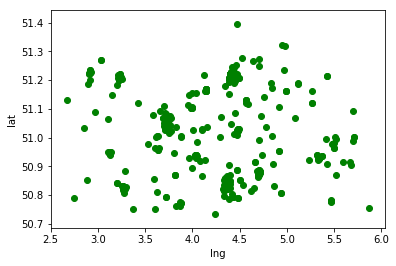

In [25]:
#+++ my code here +++
plt.scatter(df_resto.lng, df_resto.lat, color = 'green')
plt.xlabel("lng")
plt.ylabel("lat")

#### As we don't have an explicit map of Belgium in our scatterplot, it is difficult to distinguish between the different provinces and also cities. Next, we will add the provinces to our DataFrame.

> Use the pandas [.apply()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function to execute a function on each row of the dataframe. Create a function that takes a row of data (a restaurant) and using the zipcode, add an additional field to the row called "provincie" with the matching province value. Subsequently, return the row. To know which range of zipcodes match a certain province use this page: https://nl.wikipedia.org/wiki/Postcode 

In [26]:
def postcodes(row):
    #+++ my code here +++
    zipcode = row.zipcode
    provincie = " "
    try:
        # check if in range
        if 1000 <= int(zipcode) <= 1299:
            provincie = "Brussels Hoofdstedelijk Gewest"
        elif int(zipcode) in range(1300,1499):
            provincie = "Waals-Brabant"
        elif (int(zipcode) in range(1500,1999)):
            provincie = "Vlaams-Brabant"
        elif 3000 <= int(zipcode) <= 3499:
            provincie = "Vlaams-Brabant"
        elif int(zipcode) in range(2000,2999):
            provincie = "Antwerpen"
        elif int(zipcode) in range(3500,3999):
            provincie = "Limburg"
        elif int(zipcode) in range(4000,4999):
            provincie = "Luik" 
        elif int(zipcode) in range(5000,5999):
            provincie = "Namen" 
        elif (int(zipcode) in range(6000,6599)) or (int(zipcode) in range(7000,7999)):
            provincie = "Henegouwen" 
        elif int(zipcode) in range(6600,6999):
            provincie = "Luxemburg"
        elif int(zipcode) in range(8000,8999):
            provincie = "West-Vlaanderen"
        elif int(zipcode) in range(9000,9999):
            provincie = "Oost-Vlaanderen"
        else: 
            print("failed: " + str(zipcode))
        print("succeeded: " + str(zipcode) + " - " + str(provincie))
    except ValueError:
        print("failed: " + str(zipcode))
    row['provincie'] = provincie
    return row

> Execute the function using the .apply() method

In [27]:
df_resto = df_resto.apply(postcodes, 1)

succeeded: 3040 - Vlaams-Brabant
succeeded: 3040 - Vlaams-Brabant
succeeded: 9000 - Oost-Vlaanderen
succeeded: 9831 - Oost-Vlaanderen
succeeded: 2000 - Antwerpen
succeeded: 9050 - Oost-Vlaanderen
succeeded: 9000 - Oost-Vlaanderen
succeeded: 3128 - Vlaams-Brabant
succeeded: 8600 - West-Vlaanderen
succeeded: 9160 - Oost-Vlaanderen
succeeded: 9170 - Oost-Vlaanderen
succeeded: 8500 - West-Vlaanderen
succeeded: 2000 - Antwerpen
succeeded: 9000 - Oost-Vlaanderen
succeeded: 8000 - West-Vlaanderen
succeeded: 8500 - West-Vlaanderen
succeeded: 8420 - West-Vlaanderen
succeeded: 8420 - West-Vlaanderen
succeeded: 9100 - Oost-Vlaanderen
succeeded: 9500 - Oost-Vlaanderen
succeeded: 2000 - Antwerpen
succeeded: 3600 - Limburg
succeeded: 2000 - Antwerpen
succeeded: 2018 - Antwerpen
succeeded: 8500 - West-Vlaanderen
succeeded: 2018 - Antwerpen
succeeded: 1000 - Brussels Hoofdstedelijk Gewest
succeeded: 9000 - Oost-Vlaanderen
succeeded: 9040 - Oost-Vlaanderen
succeeded: 1060 - Brussels Hoofdstedelijk Gewe

succeeded: 1050 - Brussels Hoofdstedelijk Gewest
succeeded: 2018 - Antwerpen
succeeded: 3600 - Limburg
succeeded: 8800 - West-Vlaanderen
succeeded: 2000 - Antwerpen
succeeded: 1000 - Brussels Hoofdstedelijk Gewest
succeeded: 9032 - Oost-Vlaanderen
succeeded: 9100 - Oost-Vlaanderen
succeeded: 8680 - West-Vlaanderen
succeeded: 9200 - Oost-Vlaanderen
succeeded: 1000 - Brussels Hoofdstedelijk Gewest
succeeded: 3500 - Limburg
succeeded: 1000 - Brussels Hoofdstedelijk Gewest
succeeded: 2018 - Antwerpen
succeeded: 9000 - Oost-Vlaanderen
succeeded: 3500 - Limburg
succeeded: 9000 - Oost-Vlaanderen
succeeded: 9000 - Oost-Vlaanderen
succeeded: 2800 - Antwerpen
succeeded: 3600 - Limburg
succeeded: 2000 - Antwerpen
succeeded: 1000 - Brussels Hoofdstedelijk Gewest
succeeded: 1000 - Brussels Hoofdstedelijk Gewest
succeeded: 5020 - Namen
succeeded: 1050 - Brussels Hoofdstedelijk Gewest
succeeded: 1000 - Brussels Hoofdstedelijk Gewest
succeeded: 2800 - Antwerpen
succeeded: 1060 - Brussels Hoofdstedelij

#### Again, plot the coordinates of the restaurants using a scatter plot. However, only plot those that are located in West-Flanders

Text(0,0.5,'lat')

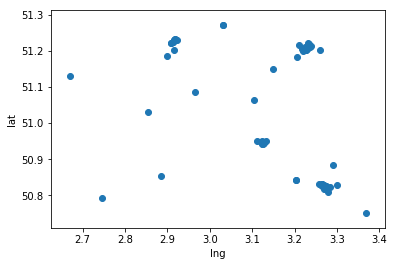

In [28]:
plt.scatter(df_resto[df_resto.provincie == "West-Vlaanderen"].lng, df_resto[df_resto.provincie == "West-Vlaanderen"].lat)
plt.xlabel("lng")
plt.ylabel("lat")

#### Plot all the restaurants of flemish provinces on a scatter plot. Plot each point according to its province. I.e. West-Vlaanderen = green; Oost-Vlaanderen = Blue; ...

Text(0,0.5,'lat')

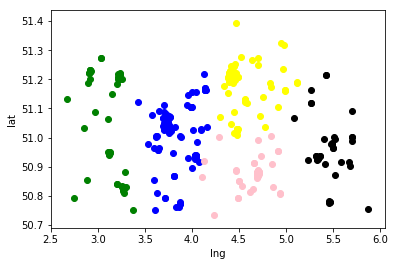

In [29]:
plt.scatter(df_resto[df_resto.provincie == "West-Vlaanderen"].lng, df_resto[df_resto.provincie == "West-Vlaanderen"].lat, color = 'green')
plt.scatter(df_resto[df_resto.provincie == "Oost-Vlaanderen"].lng, df_resto[df_resto.provincie == "Oost-Vlaanderen"].lat, color = 'blue')
plt.scatter(df_resto[df_resto.provincie == "Antwerpen"].lng, df_resto[df_resto.provincie == "Antwerpen"].lat, color = 'yellow')
plt.scatter(df_resto[df_resto.provincie == "Limburg"].lng, df_resto[df_resto.provincie == "Limburg"].lat, color = 'black')
plt.scatter(df_resto[df_resto.provincie == "Vlaams-Brabant"].lng, df_resto[df_resto.provincie == "Vlaams-Brabant"].lat, color = 'pink')
plt.xlabel("lng")
plt.ylabel("lat")

> In this map you should see the provinces better. However, it is difficult to see where the most restaurants are located.
> To improve this, we will use a [hexbin](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hexbin). Pandas also provides some plotting options (it also uses matplotlib in the background). 

#### Use the hexbin plot to plot the location density. No colors have to be assigned to the respective provinces. We only want to know the density. ####

> Set the gridsize equal to 50


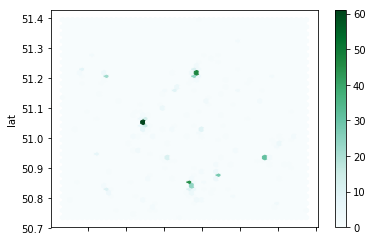

In [30]:
df_resto.plot.hexbin(x='lng',y ='lat', gridsize = 50)

> Using this map we can see that the area in "Oost-Vlaanderen" is more densly populated by restaurants than the capital.
> Next we will investigate how many restaurants there are per province

#### Plot a pie chart wherein every piece of the chart illustrates how many restaurants (percentage) there are in the respective provinces

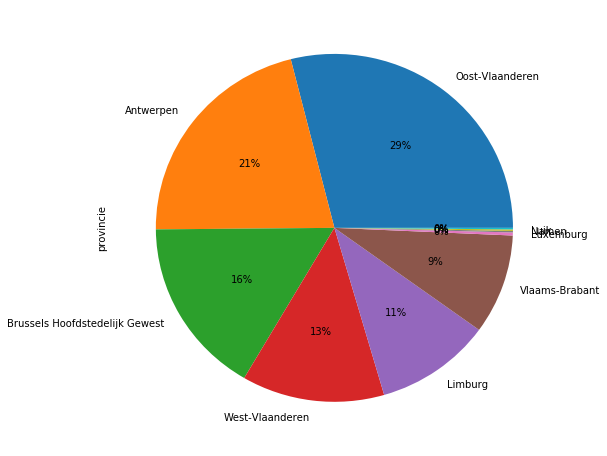

In [31]:
df_resto['provincie'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(8, 8))

#### Which provence has the most restaurants? 
> Do not use the value you can read from the pie chart. Use the value_counts function and the argmax function on the DataFrame

In [32]:
print df_resto.provincie.value_counts()
print
print "max: " + df_resto.provincie.value_counts().idxmax()

Oost-Vlaanderen                   206
Antwerpen                         151
Brussels Hoofdstedelijk Gewest    117
West-Vlaanderen                    92
Limburg                            75
Vlaams-Brabant                     66
Luxemburg                           2
Namen                               1
Luik                                1
                                    1
Name: provincie, dtype: int64

max: Oost-Vlaanderen


#### Plot a pie chart for the provence you found in the previous question. The piechart should contain three pieces, i.e. snack, eethuis and cateraar


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


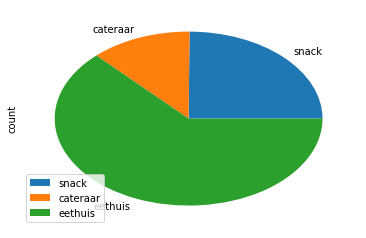

In [101]:
# not possible? pie chart divides 100% in pies.
# the problem here is that a restaurant can be for example both snack and eethuis -> more than 100%

df_resto[df_resto.provincie == "Oost-Vlaanderen"][df_resto.snack == True]['snack'].count()
df_resto[df_resto.provincie == "Oost-Vlaanderen"][df_resto.cateraar == True]['cateraar'].count()
d={'count':[df_resto[df_resto.provincie == "Oost-Vlaanderen"][df_resto.snack == True]['snack'].count(),df_resto[df_resto.provincie == "Oost-Vlaanderen"][df_resto.cateraar == True]['cateraar'].count(),df_resto[df_resto.provincie == "Oost-Vlaanderen"][df_resto.eethuis == True]['eethuis'].count()],
'tag':['snack','cateraar','eethuis']}
df2=pd.DataFrame(d, index=['snack','cateraar','eethuis'])
df2[df2.tag=='snack'].count()
df2
df2.plot.pie(y = 'count')

#### Create a stacked bardiagram. Each bar should correspond to a provence. Each segment in the bar should correspond to eethuis, snack or catraar. The pieces should represent how many restaurants in the respective province have the respective tag.

***

### Next, we will look at the other tags a restaurant can have

#### How many restaurants have the tag gastronomisch?

In [34]:
print str(df_resto[df_resto.gastronomisch == True].shape[0])

25


#### In which unique provinces are these restaurants located? And how many are there per province? Show this in a bar chart.

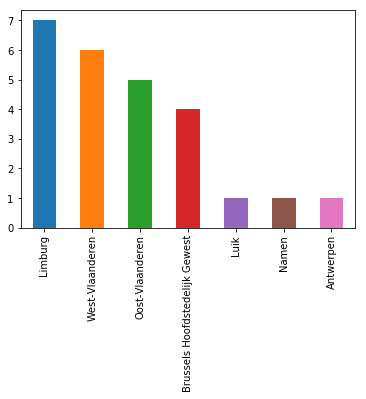

In [35]:
#df_resto[df_resto.gastronomisch == True]['provincie'].value_counts()

df_resto[df_resto.gastronomisch == True]['provincie'].value_counts().plot.bar()

#### How many restaurants are approved by eva?

In [36]:
print str(df_resto[df_resto.approvedbyeva == True].shape[0])

8


#### In which provinces are these located?

In [37]:
print str(df_resto[df_resto.approvedbyeva == True].provincie)

0     Vlaams-Brabant
1    Oost-Vlaanderen
2    Oost-Vlaanderen
3          Antwerpen
4    Oost-Vlaanderen
5    Oost-Vlaanderen
6     Vlaams-Brabant
7    West-Vlaanderen
Name: provincie, dtype: object


***

#### How many restaurants are there with 5 tags, how many with 4 tags, etc ... plot this is a bar diagram (tags are the columns with boolean values)

In [38]:
def count_tags(row):
    # Count how many tags there are in the row
    try:
        x= 0
        if row.cateraar == True:
            x = x + 1
        if row.snack == True:
            x = x + 1
        if row.eethuis == True:
            x = x + 1
        if row.veganvriendelijk == True:
            x = x + 1
        if row.approvedbyeva == True:
            x = x + 1
        if row.cateraar == True:
            x = x + 1
        if row.gastronomisch == True:
            x = x + 1
        if row.evavoordeel == True:
            x = x + 1
        if row.vegan == True:
            x = x + 1
        if row.plant == True:
            x = x + 1
        
        row['nr_of_tags']= x
    except:
        row['nr_of_tags']=0
        
    return row

In [39]:
#Apply the above function on the DataFrame
df_resto = df_resto.apply(count_tags, 1)

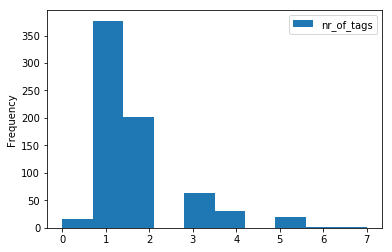

In [40]:
df_resto.plot.hist(y='nr_of_tags')

#### Create a scatter plot of the locations of the restaurants (longitude versus latitude), where the size of the points is equal to number of tags to the power of three

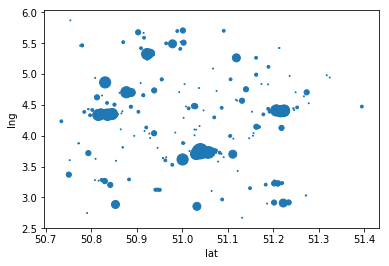

In [116]:
s = df_resto.nr_of_tags
ax1 = df_resto.plot.scatter(x = 'lat', y = 'lng', s = s*s*s)

#### Create a pie chart plot for each individual provence. Each pie chart should illustrate how many restaurants have how many tags (in percentage)

> HINT: this can be done using one single command by chaining several methods

> HINT: plotting can be done using subplots

In [1]:
#df_resto['nr_of_tags'].value_counts().plot.pie(subplots = True)

#df_resto[df_resto.provincie == "Oost-Vlaanderen"]['nr_of_tags'].value_counts().plot.pie(subplots = True, y = 'provincie')

#df_resto.plot.pie( subplots = True, figsize=(8, 4))

#df_resto['provincie']["nr_of_tags"]

## Material You Need to Submit
For this lab session, the notebooks with all source code, optional extra files need to be handed in using Minerva. Zip or rar your notebook and files and name the archive: 2017-2018_Lab1_Name.zip/.rar. The lab files needs to be uploaded before the start of the next lab session. Make sure all your notebooks are already executed when you upload them (i.e. there should be output after the cells). 

The end